In [1]:
from tabulate import tabulate
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import gensim
import pickle
import gensim
from collections import Counter, defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from gensim.models import FastText
from sklearn.decomposition import PCA
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D, Flatten
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

#words_pickle, embeddings = pickle.load(open('/Users/adamwidibagaskarta/AnacondaProjects/SIT/polyglot-id.pkl', 'rb'), encoding='latin1')
#print("Emebddings shape is {}".format(embeddings.shape))

#TRAIN_SET_PATH = "r8-no-stop.txt"
#GLOVE_6B_50D_PATH = "glove.6B/glove.6B.50d.txt"
#WORD2VEC_ID_PATH = "/Users/adamwidibagaskarta/AnacondaProjects/SIT/polyglot-id.pkl"
#encoding="utf-8"
#max_sentence_len = 10
#data_folder = '/Users/adamwidibagaskarta/AnacondaProjects/SIT'

Using TensorFlow backend.


In [2]:
#Dataset form Twitter
file_input = "/Users/adamwidibagaskarta/AnacondaProjects/testing library/REVISI_ALL.txt"
file = open(file_input, mode='r', encoding='utf-8')
text = file.readlines()

A, b = [], []
with open(file_input, "r") as filetweet:
    for line in filetweet:
        texts, label = line.split(",")
        label = label.split('\n')
        A.append(texts.split())
        b.append(label[0])
A, b = np.array(A), np.array(b)
print ("total examples %s" % len(b))

total examples 86


/Users/adamwidibagaskarta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


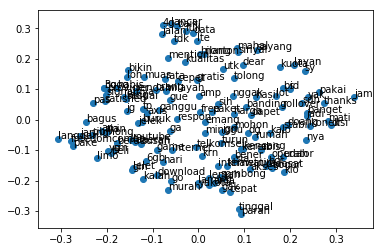

In [3]:
model = gensim.models.Word2Vec(A, size=2, min_count=2, sg=0)
to_pca = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(to_pca)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

w2v = {w: vec for w, vec in zip(model.wv.index2word, model.wv.vectors)}

In [4]:
len(w2v)

136

In [5]:
max_fatures = len(w2v)
tokenizer = Tokenizer(num_words=max_fatures)
tokenizer.fit_on_texts(A)
Q = tokenizer.texts_to_sequences(A)
Q = pad_sequences(Q)

In [6]:
word_index = tokenizer.word_index
print(len(word_index))

485


In [7]:
embedding_layer = Embedding(len(w2v)+1, # or len(word_index) + 1
                            100, # or EMBEDDING_DIM,
                            weights=[w2v],
                            trainable=False)

In [9]:
nn_model = Sequential()
nn_model.add(embedding_layer)
nn_model.add(SpatialDropout1D(0.4))
nn_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
nn_model.add(Dense(2,activation='softmax'))
nn_model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(nn_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         13700     
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, None, 100)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 94,302
Trainable params: 80,602
Non-trainable params: 13,700
_________________________________________________________________
None


In [10]:
W = pd.get_dummies(b)

In [11]:
W.shape

(86, 2)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(Q, W, test_size=0.33, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(57, 14) (57, 2)
(29, 14) (29, 2)


In [13]:
type(Q)

numpy.ndarray

In [14]:
batch_size = 32
nn_model.fit(X_train, y_train, epochs = 500, batch_size=batch_size, verbose = 2)

Epoch 1/500
 - 0s - loss: 0.6928 - acc: 0.5789
Epoch 2/500
 - 0s - loss: 0.6899 - acc: 0.6491
Epoch 3/500
 - 0s - loss: 0.6902 - acc: 0.6140
Epoch 4/500
 - 0s - loss: 0.6869 - acc: 0.6316
Epoch 5/500
 - 0s - loss: 0.6875 - acc: 0.6491
Epoch 6/500
 - 0s - loss: 0.6844 - acc: 0.6842
Epoch 7/500
 - 0s - loss: 0.6829 - acc: 0.7719
Epoch 8/500
 - 0s - loss: 0.6803 - acc: 0.7193
Epoch 9/500
 - 0s - loss: 0.6769 - acc: 0.7018
Epoch 10/500
 - 0s - loss: 0.6770 - acc: 0.6842
Epoch 11/500
 - 0s - loss: 0.6757 - acc: 0.6842
Epoch 12/500
 - 0s - loss: 0.6739 - acc: 0.7544
Epoch 13/500
 - 0s - loss: 0.6727 - acc: 0.7193
Epoch 14/500
 - 0s - loss: 0.6697 - acc: 0.6842
Epoch 15/500
 - 0s - loss: 0.6664 - acc: 0.7018
Epoch 16/500
 - 0s - loss: 0.6660 - acc: 0.7544
Epoch 17/500
 - 0s - loss: 0.6628 - acc: 0.7895
Epoch 18/500
 - 0s - loss: 0.6725 - acc: 0.6842
Epoch 19/500
 - 0s - loss: 0.6523 - acc: 0.8070
Epoch 20/500
 - 0s - loss: 0.6615 - acc: 0.7018
Epoch 21/500
 - 0s - loss: 0.6601 - acc: 0.7544
E

Epoch 171/500
 - 0s - loss: 0.1592 - acc: 0.9649
Epoch 172/500
 - 0s - loss: 0.1686 - acc: 0.8947
Epoch 173/500
 - 0s - loss: 0.2145 - acc: 0.9123
Epoch 174/500
 - 0s - loss: 0.0959 - acc: 0.9649
Epoch 175/500
 - 0s - loss: 0.2036 - acc: 0.9298
Epoch 176/500
 - 0s - loss: 0.1403 - acc: 0.9298
Epoch 177/500
 - 0s - loss: 0.1255 - acc: 0.9825
Epoch 178/500
 - 0s - loss: 0.1601 - acc: 0.9298
Epoch 179/500
 - 0s - loss: 0.2561 - acc: 0.8947
Epoch 180/500
 - 0s - loss: 0.2967 - acc: 0.8596
Epoch 181/500
 - 0s - loss: 0.2741 - acc: 0.8596
Epoch 182/500
 - 0s - loss: 0.2416 - acc: 0.8421
Epoch 183/500
 - 0s - loss: 0.1451 - acc: 0.9825
Epoch 184/500
 - 0s - loss: 0.1523 - acc: 0.9825
Epoch 185/500
 - 0s - loss: 0.2513 - acc: 0.8772
Epoch 186/500
 - 0s - loss: 0.2136 - acc: 0.8947
Epoch 187/500
 - 0s - loss: 0.2050 - acc: 0.9474
Epoch 188/500
 - 0s - loss: 0.1911 - acc: 0.9649
Epoch 189/500
 - 0s - loss: 0.2374 - acc: 0.9123
Epoch 190/500
 - 0s - loss: 0.2366 - acc: 0.9474
Epoch 191/500
 - 0s 

 - 0s - loss: 0.0967 - acc: 0.9649
Epoch 339/500
 - 0s - loss: 0.1071 - acc: 0.9474
Epoch 340/500
 - 0s - loss: 0.0732 - acc: 0.9825
Epoch 341/500
 - 0s - loss: 0.0745 - acc: 0.9825
Epoch 342/500
 - 0s - loss: 0.0803 - acc: 0.9825
Epoch 343/500
 - 0s - loss: 0.0671 - acc: 0.9825
Epoch 344/500
 - 0s - loss: 0.0935 - acc: 0.9649
Epoch 345/500
 - 0s - loss: 0.0604 - acc: 1.0000
Epoch 346/500
 - 0s - loss: 0.0735 - acc: 0.9825
Epoch 347/500
 - 0s - loss: 0.0604 - acc: 1.0000
Epoch 348/500
 - 0s - loss: 0.1262 - acc: 0.9474
Epoch 349/500
 - 0s - loss: 0.0711 - acc: 0.9825
Epoch 350/500
 - 0s - loss: 0.1371 - acc: 0.9474
Epoch 351/500
 - 0s - loss: 0.0844 - acc: 0.9474
Epoch 352/500
 - 0s - loss: 0.0757 - acc: 0.9649
Epoch 353/500
 - 0s - loss: 0.1019 - acc: 0.9474
Epoch 354/500
 - 0s - loss: 0.1257 - acc: 0.9474
Epoch 355/500
 - 0s - loss: 0.1029 - acc: 0.9649
Epoch 356/500
 - 0s - loss: 0.0939 - acc: 0.9825
Epoch 357/500
 - 0s - loss: 0.1040 - acc: 0.9649
Epoch 358/500
 - 0s - loss: 0.0613

In [ ]:
score = nn_model.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score[1]*100))

In [ ]:
# define 10-fold cross validation test harness
kfold = KFold(n_splits=5)
cvscores = []
Q_train_cv = []
W_train_cv = []
Q_test_cv = []
W_test_cv = []
for train, test in kfold.split(Q, W):
    Q_train_cv.clear()
    Q_test_cv.clear()
    W_test_cv.clear()
    W_train_cv.clear()
  # create model
    model_cv = Sequential()
    model_cv.add(embedding_layer)
    model_cv.add(SpatialDropout1D(0.4))
    model_cv.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model_cv.add(Dense(2,activation='softmax'))
    # Compile model
    model_cv.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
    
    for i in train:
        #print(Q[i])
        Q_train_cv.append(Q[i])
        W_train_cv.append(W.values[i])
    
    for i in test:
        #print(Q[i])
        Q_test_cv.append(Q[i])
        W_test_cv.append(W.values[i])
    
    M, N = np.array(Q_train_cv), np.array(W_train_cv)
    O, P = np.array(Q_test_cv), np.array(W_test_cv)
    # Fit the model
    model_cv.fit(M, N, epochs=500, batch_size=32, verbose=2)
    # evaluate the model
    scores = model_cv.evaluate(O, P, verbose=2)
    print("%s: %.2f%%" % (model_cv.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [ ]:
#5 FOLD 500 epoch 2 windows
68.63% (+/- 4.47%)

#10 FOLD 500 epoch 2 windows
69.86% (+/- 18.98%)
62.92% (+/- 14.87%)

#without CV
72.41%
score: 58.62

In [ ]:
cvscores.clear()